<a href="https://colab.research.google.com/github/iam-fern/Generate_homo_random_1/blob/main/Generate_homo_random_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sp.random.seed(314157)
data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, 500000),
                     "X2" : sp.random.uniform(20, 100, 500000),
                     "X3" : sp.random.uniform(20, 100, 500000)})
data

,X1,X2,X3
0,68.854520,60.657374,85.486277
1,57.329540,52.565442,91.356163
2,45.215694,67.829610,53.559720
3,69.375325,89.227027,29.890049
4,87.837297,47.691935,88.033699
...,...,...,...
499995,22.978037,98.682652,61.774236
499996,22.501883,74.015803,31.770244
499997,38.845831,81.464248,50.832347
499998,31.189864,25.591015,48.606149


In [41]:
X1 = data["X1"]
X2 = data["X2"]
X3 = data["X3"]

new_data = pd.DataFrame({"X1" : data["X1"],
                         "X2" : data["X2"],
                         "X3" : data["X3"],
                         "e"  : np.random.normal(0, 1, 500000)})

In [42]:
new_data.to_csv('data_var3_random_1.csv')
files.download('data_var3_random_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
n=250
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({"x1" : data_new["X1"],
                               "x2" : data_new["X2"],
                               "x3" : data_new["X3"],
                               "e"  : data_new["e"]})
  

    table_data["Y"] = 10 + table_data["x1"] + table_data["x2"] + table_data["x3"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

x1         x2         x3         e           Y
rep   index                                                       
0.0   0.0    61.908199  91.731102  40.614820 -0.194085  204.060036
      1.0    57.638887  20.417849  44.163305 -0.370413  131.849628
      2.0    55.986219  23.666537  20.130770 -1.343772  108.439754
      3.0    25.502512  76.492261  98.118848  0.260503  210.374124
      4.0    54.240258  35.049416  39.725720 -0.677564  138.337829
...                ...        ...        ...       ...         ...
999.0 245.0  24.189705  33.568512  21.636273  1.503925   90.898415
      246.0  52.425819  85.403674  70.475496 -0.110880  218.194109
      247.0  66.253981  55.626206  30.520548  0.664740  163.065476
      248.0  67.149902  89.520277  69.112220 -0.450459  235.331939
      249.0  58.741660  94.768658  53.051673  1.428260  217.990251

[250000 rows x 5 columns]

In [56]:
x = table_data_all[["x1", "x2", "x3",]]
y = table_data_all["Y"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({"x1"   : table_data_all["x1"],
                               "x2"   : table_data_all["x2"],
                               "x3"   : table_data_all["x3"],
                               "e"     : table_data_all["e"],
                               "Y"     : df["Actual"],
                               "y_hat" : df["Predicted"]})
table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
table_data_new

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.908199  91.731102  40.614820  ...  204.060036  204.258132 -0.198096
      1.0    57.638887  20.417849  44.163305  ...  131.849628  132.222756 -0.373129
      2.0    55.986219  23.666537  20.130770  ...  108.439754  109.783988 -1.344234
      3.0    25.502512  76.492261  98.118848  ...  210.374124  210.125315  0.248809
      4.0    54.240258  35.049416  39.725720  ...  138.337829  139.018262 -0.680433
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  24.189705  33.568512  21.636273  ...   90.898415   89.397334  1.501080
      246.0  52.425819  85.403674  70.475496  ...  218.194109  218.312450 -0.118342
      247.0  66.253981  55.626206  30.520548  ...  163.065476  162.402480  0.662996
      248.0  67.149902  89.520277  69.112220  ...  235.331939  235.788923 -0.456984
      249.0  58.741660  94.768658  53.051673  ...  217.990251  216.567543  1.422708

[250000 rows x 7 columns]

In [57]:
table_data_new.to_csv("data_var3_random1_n250.csv")
files.download("data_var3_random1_n250.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

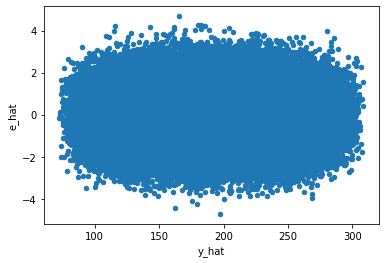

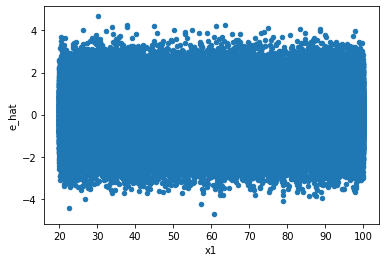

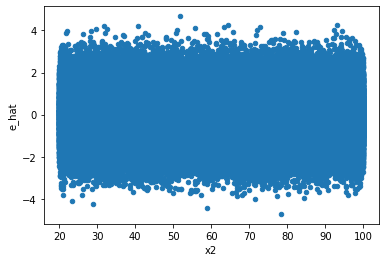

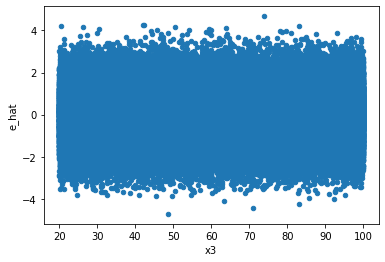

In [20]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')